In [1]:
from parflowio.pyParflowio import PFData
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

# load indicator template

In [10]:
indi_pfb = PFData('template_indicator.pfb')
indi_pfb.loadHeader();
indi_pfb.loadData();
indi_mask = indi_pfb.copyDataArray()[0]
indi_mask[indi_mask > 0] = 1

# create new indicator array

In [11]:
indi_arr = np.expand_dims(indi_mask,axis=0)
indi_arr = np.tile(indi_arr,(25,1,1))

# update values

In [12]:
indi_arr[0:5][indi_arr[0:5]==1] = 6
indi_arr[5:15][indi_arr[5:15]==1] = 5
indi_arr[-1][indi_arr[-1]==1] = 4

# write pfb

In [13]:
indi_pfb.setDataArray(indi_arr)
indi_pfb.writeFile('ctrH_indicator.pfb');

# test

In [14]:
pfb = PFData('ctrH_indicator.pfb')
pfb.loadHeader();
pfb.loadData();
arr = pfb.copyDataArray()

In [15]:
np.shape(arr)

(25, 64, 24)

In [16]:
for i in np.arange(25):
    print(np.unique(arr[i]))

[-999.    6.]
[-999.    6.]
[-999.    6.]
[-999.    6.]
[-999.    6.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    5.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    1.]
[-999.    4.]


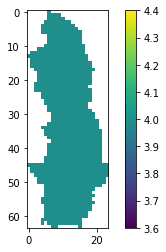

In [20]:
arr[arr==-999] = np.nan
plt.imshow(arr[-1]);
plt.colorbar();